In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# set version
version = "full"

# load metrics
metrics = pd.read_csv(f"lightning_logs/{version}/metrics.csv")

# merge entries on the same step
metrics = metrics.groupby("step").first()
display(metrics)

,dib_0,dib_1,dib_2,epoch,nc_layer_0,nc_layer_1,nc_output,train_acc,train_loss
step,,,,,,,,,
49,NaN,NaN,NaN,0,NaN,NaN,NaN,0.185,2.229296
99,NaN,NaN,NaN,0,NaN,NaN,NaN,0.315,1.875902
149,NaN,NaN,NaN,0,NaN,NaN,NaN,0.435,1.703299
199,NaN,NaN,NaN,0,NaN,NaN,NaN,0.425,1.629834
249,0.219945,0.147625,2.083773,0,421.491821,327.745636,992.784607,0.480,1.534115
299,NaN,NaN,NaN,1,NaN,NaN,NaN,0.440,1.531184
349,NaN,NaN,NaN,1,NaN,NaN,NaN,0.515,1.366600
399,NaN,NaN,NaN,1,NaN,NaN,NaN,0.460,1.447096
449,NaN,NaN,NaN,1,NaN,NaN,NaN,0.530,1.385805


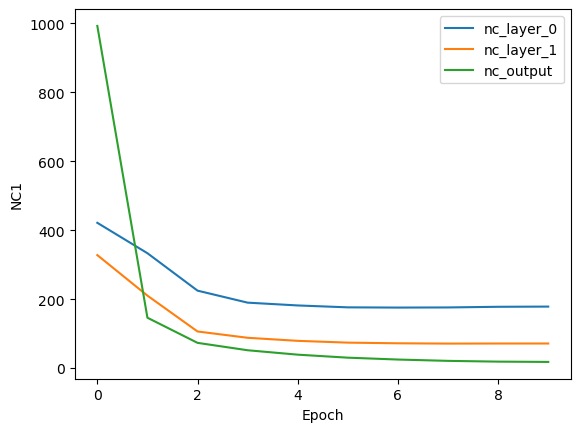

In [7]:
# plot NC1
no_nan = metrics.drop(columns="dib_0").dropna()
nc_cols = no_nan.filter(like="nc_").columns
no_nan.plot(x="epoch", y=nc_cols)
plt.xlabel("Epoch")
plt.ylabel("NC1")
plt.show()

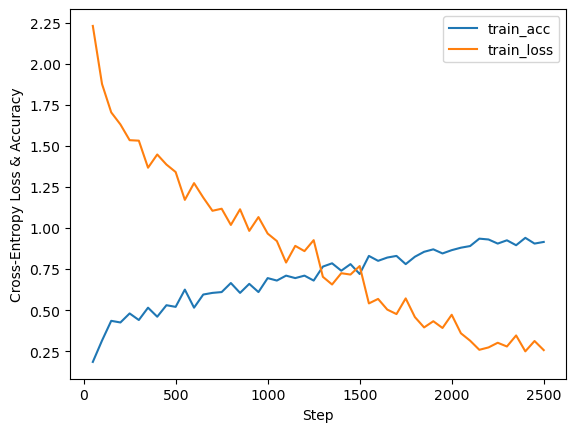

KeyError: 'lr'

In [4]:
# plot train loss and accuracy
train_cols = metrics.filter(like="train_").columns
metrics.plot(y=train_cols, use_index=True)
# plt.ylim(0,1)
plt.xlabel("Step")
plt.ylabel("Cross-Entropy Loss & Accuracy")
plt.legend()
plt.show()

metrics.plot(y="lr", use_index=True)
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.show()

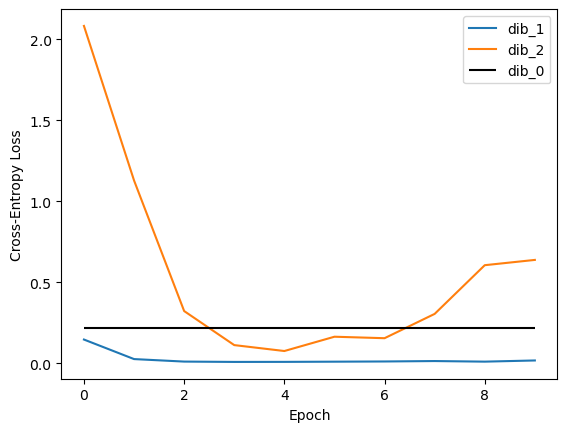

In [5]:
# extract DIB0
dib_0 = metrics["dib_0"].dropna().iloc[0]
no_dib_0 = metrics.drop(columns="dib_0").dropna()

# plot DIB
dib_cols = no_dib_0.filter(like="dib_").columns
no_dib_0.plot(x="epoch", y=dib_cols)
plt.hlines(dib_0, 0, no_dib_0.shape[0] - 1, color="black", label="dib_0")
# plt.xlim(0,150)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.show()

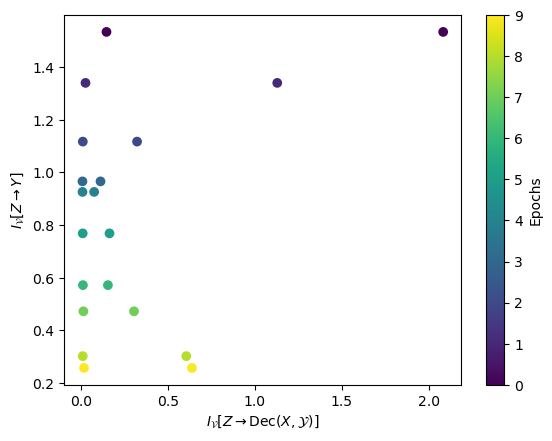

In [6]:
# IP analysis
for dib in dib_cols:
    plt.scatter(metrics[dib], metrics["train_loss"], cmap="viridis", c=metrics["epoch"])
    plt.plot(metrics[dib], metrics["train_loss"], color="gray", linewidth=0.5)
plt.xlabel(r"$I_{\mathcal{V}}[Z \to \operatorname{Dec}(X,\mathcal{Y})]$")
plt.ylabel(r"$I_{\mathcal{V}}[Z \to Y]$")
plt.colorbar(label="Epochs")
plt.show()